In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
from src import KArmedBandit, EGreedy, UCB, GradientBandit, ThompsonSampling

In [2]:
def select_and_log(algo, bandit, returns, optimal):
    """Select an arm and save the results a numpy array."""
    action = algo.select_action()
    reward = bandit.pull_arm(action)
    algo.update(action, reward)
    optimal[step] = action == bandit.best_arm()
    returns[step] = reward
    return returns, optimal

## Standard comparison

In [3]:
k = 10
num_trials = 2000
num_steps = 1000
avg_return = {"UCB": [], "E-greedy": [], "Gradient bandit": [], "Thompson sampling": []}
optimality = {"UCB": [], "E-greedy": [], "Gradient bandit": [], "Thompson sampling": []}

In [4]:
for trial in range(num_trials):
    eddi = EGreedy(eps=0.1, k=k, optimistic=False)
    ucb = UCB(k=10, confidence=2)
    gb = GradientBandit(k=10, use_baseline=True)
    ts = ThompsonSampling(k=10)
    testbed = KArmedBandit(k, is_stationary=True)
    # This is a bit ugly...
    rewards_greedy = np.empty(num_steps)
    is_optimal_greedy = np.empty(num_steps, dtype=bool)
    rewards_ucb = np.empty(num_steps)
    is_optimal_ucb = np.empty(num_steps, dtype=bool)
    rewards_gb = np.empty(num_steps)
    is_optimal_gb = np.empty(num_steps, dtype=bool)
    rewards_ts = np.empty(num_steps)
    is_optimal_ts = np.empty(num_steps, dtype=bool)
    for step in range(num_steps):
        # Epsilon greedy
        rewards_greedy, is_optimal_greedy = select_and_log(
            eddi, testbed, rewards_greedy, is_optimal_greedy
        )

        # UCB
        rewards_ucb, is_optimal_ucb = select_and_log(
            ucb, testbed, rewards_ucb, is_optimal_ucb
        )

        # Gradient bandit
        rewards_gb, is_optimal_gb = select_and_log(
            gb, testbed, rewards_gb, is_optimal_gb
        )

        # Thompson Sampling
        rewards_ts, is_optimal_ts = select_and_log(
            ts, testbed, rewards_ts, is_optimal_ts
        )

    avg_return["E-greedy"].append(rewards_greedy)
    optimality["E-greedy"].append(is_optimal_greedy)
    avg_return["UCB"].append(rewards_ucb)
    optimality["UCB"].append(is_optimal_ucb)
    avg_return["Gradient bandit"].append(rewards_gb)
    optimality["Gradient bandit"].append(is_optimal_gb)
    avg_return["Thompson sampling"].append(rewards_ts)
    optimality["Thompson sampling"].append(is_optimal_ts)

for key in avg_return.keys():
    avg_return[key] = np.stack(avg_return[key]).mean(axis=0)
    optimality[key] = np.stack(optimality[key]).mean(axis=0)

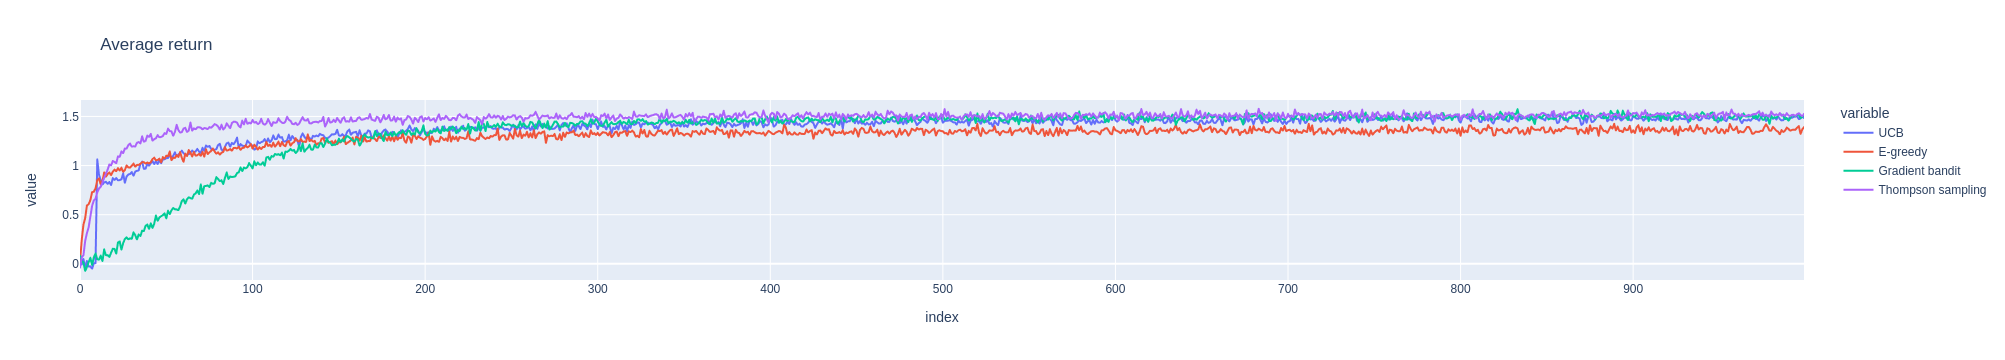

In [5]:
px.line(avg_return, title="Average return")

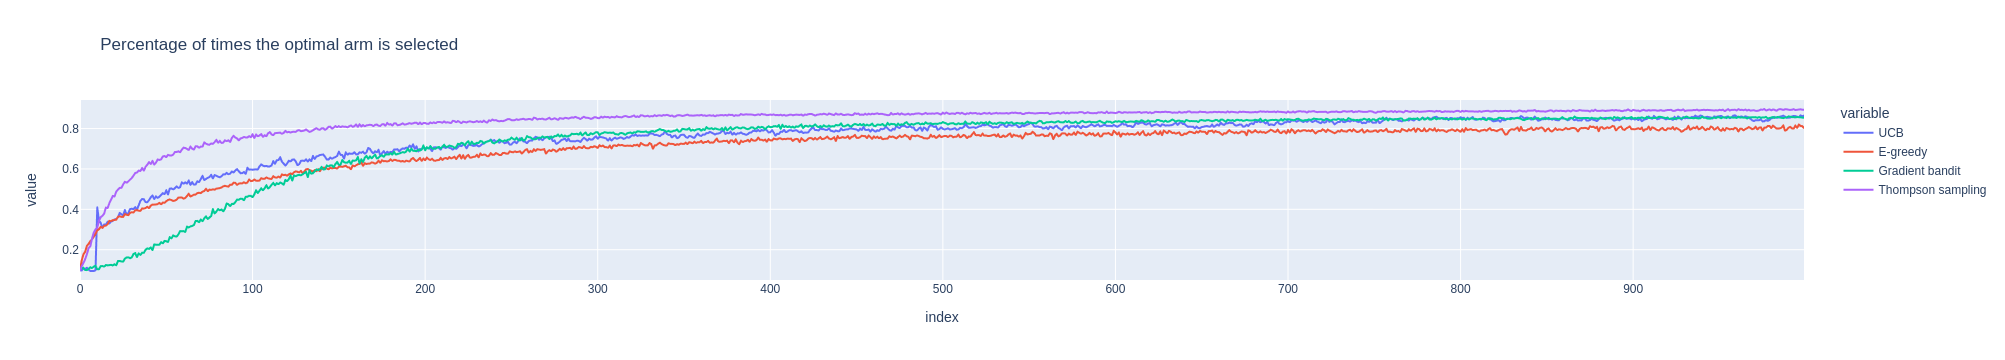

In [6]:
px.line(optimality, title="Percentage of times the optimal arm is selected")

## Shifted Means

In [7]:
k = 10
num_trials = 2000
num_steps = 1000
avg_return = {"UCB": [], "E-greedy": [], "Gradient bandit": [], "Thompson sampling": []}
optimality = {"UCB": [], "E-greedy": [], "Gradient bandit": [], "Thompson sampling": []}

In [8]:
for trial in range(num_trials):
    eddi = EGreedy(eps=0.1, k=k, optimistic=False)
    ucb = UCB(k=10, confidence=2)
    gb = GradientBandit(k=10, use_baseline=True)
    ts = ThompsonSampling(k=10)
    testbed = KArmedBandit(k, is_stationary=True)
    testbed.means += 4
    # This is a bit ugly...
    rewards_greedy = np.empty(num_steps)
    is_optimal_greedy = np.empty(num_steps, dtype=bool)
    rewards_ucb = np.empty(num_steps)
    is_optimal_ucb = np.empty(num_steps, dtype=bool)
    rewards_gb = np.empty(num_steps)
    is_optimal_gb = np.empty(num_steps, dtype=bool)
    rewards_ts = np.empty(num_steps)
    is_optimal_ts = np.empty(num_steps, dtype=bool)
    for step in range(num_steps):
        # Epsilon greedy
        rewards_greedy, is_optimal_greedy = select_and_log(
            eddi, testbed, rewards_greedy, is_optimal_greedy
        )

        # UCB
        rewards_ucb, is_optimal_ucb = select_and_log(
            ucb, testbed, rewards_ucb, is_optimal_ucb
        )

        # Gradient bandit
        rewards_gb, is_optimal_gb = select_and_log(
            gb, testbed, rewards_gb, is_optimal_gb
        )

        # Thompson Sampling
        rewards_ts, is_optimal_ts = select_and_log(
            ts, testbed, rewards_ts, is_optimal_ts
        )

    avg_return["E-greedy"].append(rewards_greedy)
    optimality["E-greedy"].append(is_optimal_greedy)
    avg_return["UCB"].append(rewards_ucb)
    optimality["UCB"].append(is_optimal_ucb)
    avg_return["Gradient bandit"].append(rewards_gb)
    optimality["Gradient bandit"].append(is_optimal_gb)
    avg_return["Thompson sampling"].append(rewards_ts)
    optimality["Thompson sampling"].append(is_optimal_ts)

for key in avg_return.keys():
    avg_return[key] = np.stack(avg_return[key]).mean(axis=0)
    optimality[key] = np.stack(optimality[key]).mean(axis=0)

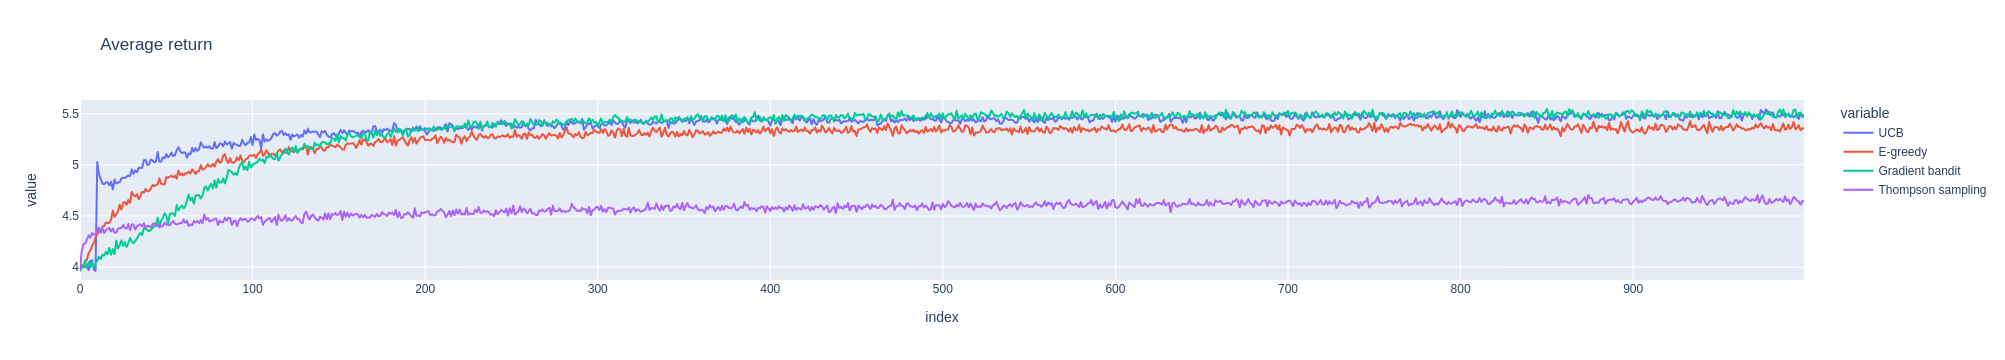

In [9]:
px.line(avg_return, title="Average return")

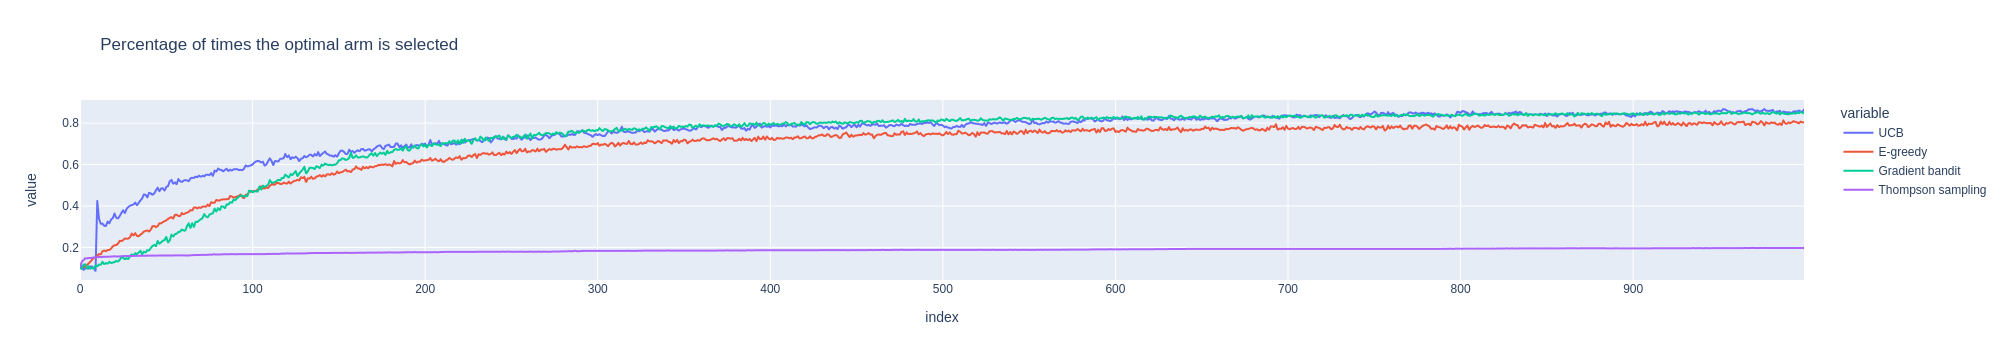

In [10]:
px.line(optimality, title="Percentage of times the optimal arm is selected")

## Non-stationary bandit

In [11]:
k = 10
num_trials = 2000
num_steps = 1000
avg_return = {"UCB": [], "E-greedy": [], "Gradient bandit": [], "Thompson sampling": []}
optimality = {"UCB": [], "E-greedy": [], "Gradient bandit": [], "Thompson sampling": []}

In [12]:
for trial in range(num_trials):
    eddi = EGreedy(eps=0.1, k=k, optimistic=False)
    ucb = UCB(k=10, confidence=2)
    gb = GradientBandit(k=10, use_baseline=True)
    ts = ThompsonSampling(k=10)
    testbed = KArmedBandit(k, is_stationary=False)
    # This is a bit ugly...
    rewards_greedy = np.empty(num_steps)
    is_optimal_greedy = np.empty(num_steps, dtype=bool)
    rewards_ucb = np.empty(num_steps)
    is_optimal_ucb = np.empty(num_steps, dtype=bool)
    rewards_gb = np.empty(num_steps)
    is_optimal_gb = np.empty(num_steps, dtype=bool)
    rewards_ts = np.empty(num_steps)
    is_optimal_ts = np.empty(num_steps, dtype=bool)
    for step in range(num_steps):
        # Epsilon greedy
        rewards_greedy, is_optimal_greedy = select_and_log(
            eddi, testbed, rewards_greedy, is_optimal_greedy
        )

        # UCB
        rewards_ucb, is_optimal_ucb = select_and_log(
            ucb, testbed, rewards_ucb, is_optimal_ucb
        )

        # Gradient bandit
        rewards_gb, is_optimal_gb = select_and_log(
            gb, testbed, rewards_gb, is_optimal_gb
        )

        # Thompson Sampling
        rewards_ts, is_optimal_ts = select_and_log(
            ts, testbed, rewards_ts, is_optimal_ts
        )

    avg_return["E-greedy"].append(rewards_greedy)
    optimality["E-greedy"].append(is_optimal_greedy)
    avg_return["UCB"].append(rewards_ucb)
    optimality["UCB"].append(is_optimal_ucb)
    avg_return["Gradient bandit"].append(rewards_gb)
    optimality["Gradient bandit"].append(is_optimal_gb)
    avg_return["Thompson sampling"].append(rewards_ts)
    optimality["Thompson sampling"].append(is_optimal_ts)

for key in avg_return.keys():
    avg_return[key] = np.stack(avg_return[key]).mean(axis=0)
    optimality[key] = np.stack(optimality[key]).mean(axis=0)

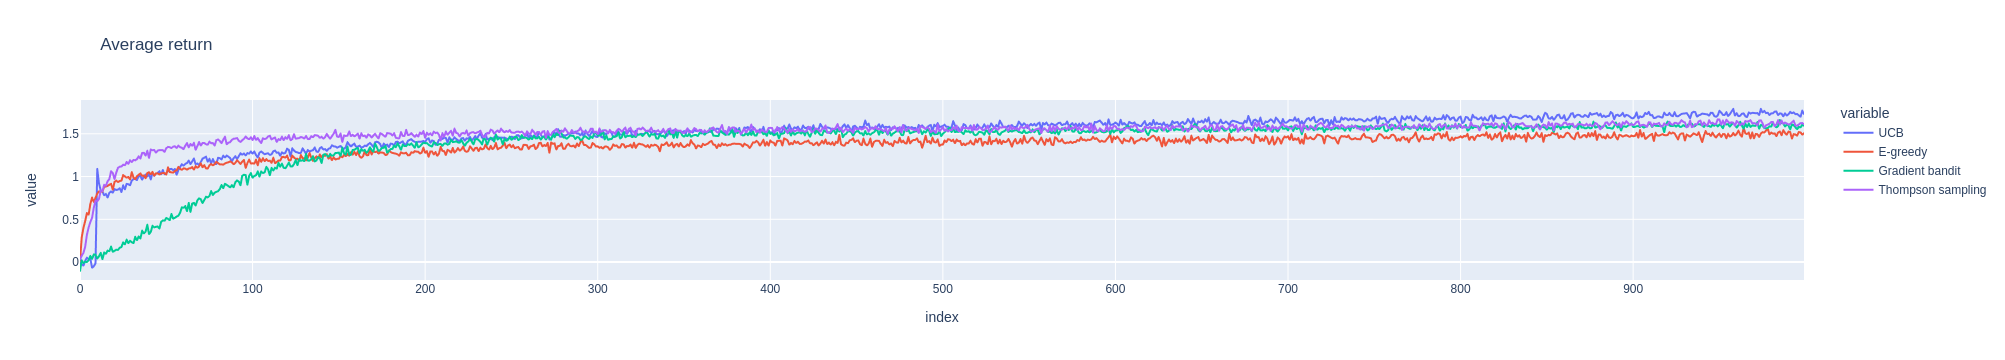

In [13]:
px.line(avg_return, title="Average return")

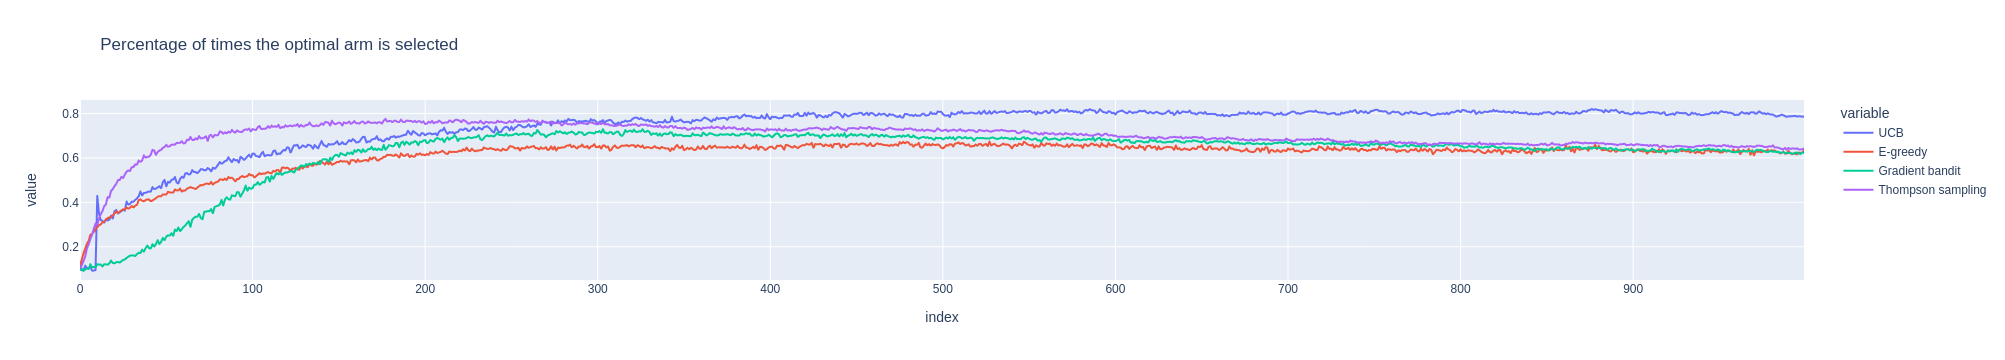

In [14]:
px.line(optimality, title="Percentage of times the optimal arm is selected")